# 从tushare拿股票数据

In [1]:
import pandas as pd

import time

import datetime

import numpy as np

import tushare as ts

import matplotlib.pyplot as plt

plt.style.use("ggplot")

token = '853dc3c60f376abbb504d43d7b1e85f3e8a973350021437b9b720260'

pro = ts.pro_api(token)

In [2]:
pd.options.display.max_columns = 30
pd.options.display.max_rows= 10

In [3]:
all_stocks = pro.stock_basic()

all_stocks

,ts_code,symbol,name,area,industry,market,list_date
0,000001.SZ,000001,平安银行,深圳,银行,主板,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,主板,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,主板,19910114
3,000005.SZ,000005,世纪星源,深圳,房产服务,主板,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,主板,19920427
...,...,...,...,...,...,...,...
3585,603993.SH,603993,洛阳钼业,河南,小金属,主板,20121009
3586,603996.SH,603996,中新科技,浙江,家用电器,主板,20151222
3587,603997.SH,603997,继峰股份,浙江,汽车配件,主板,20150302
3588,603998.SH,603998,方盛制药,湖南,中成药,主板,20141205


# '002239.SZ'

In [11]:
df = pro.daily(ts_code='000001.SZ')
df.index = pd.to_datetime(df['trade_date'])
del df['trade_date']
df = df[::-1]

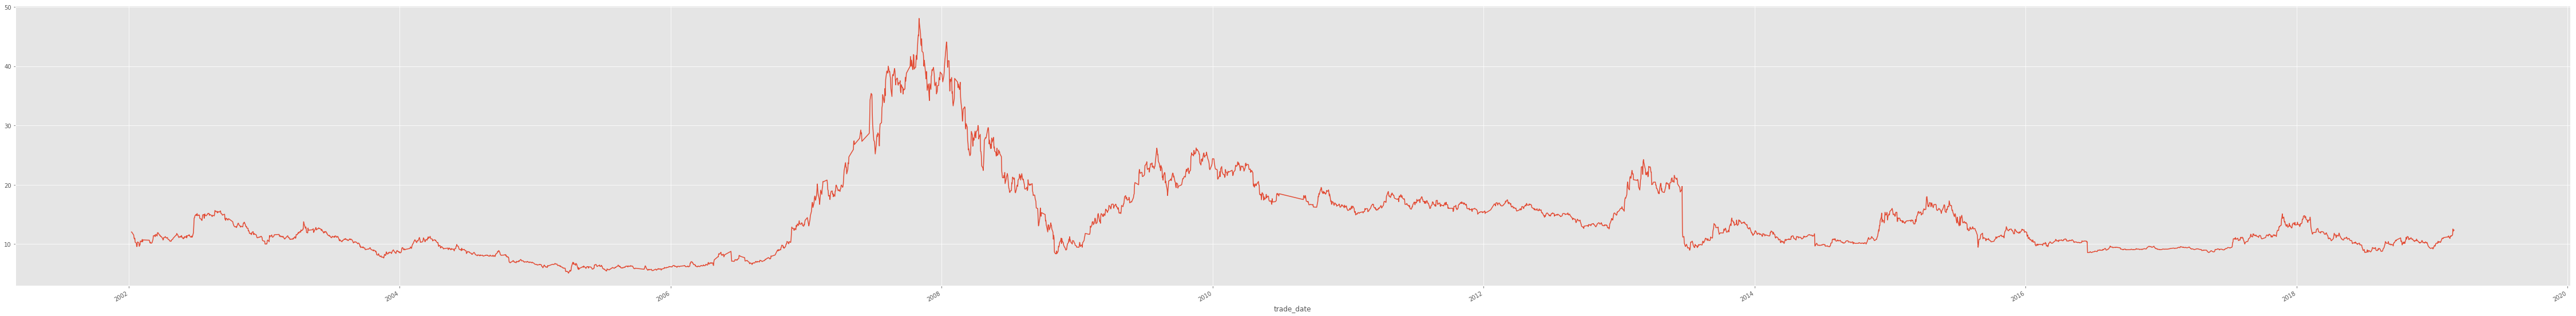

In [13]:
df['pre_close'].plot(figsize=(80,10),grid=True)

In [14]:
class df_model:
    def __init__(self,raw_data):
        self.data = raw_data
    
    
    def add_factor(self,var_name,src_data):
        temp_data = self.data.copy()
        temp_data[var_name] = src_data
        self.data = temp_data
        return temp_data
    
    
    def add_target(self,target_name,src_data):
        temp_data = self.data.copy()
        temp_data[target_name] = src_data
        self.data = temp_data
        return temp_data
    
    
    def dropnull(self):
        return self.data.dropna(inplace=True)

In [15]:
# normalization
def predictor_normalizaiton(df,col):
    return ((df[col] - df[col].mean())/(df[col].max() - df[col].min()))

In [26]:
df

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
2002-01-08,000001.SZ,12.02,12.18,12.00,12.02,12.04,-0.02,-0.1700,14385.26,1.735209e+04
2002-01-09,000001.SZ,12.00,12.05,11.85,11.89,12.02,-0.13,-1.0800,23650.08,2.821999e+04
2002-01-10,000001.SZ,11.85,11.90,11.48,11.81,11.89,-0.08,-0.6700,58288.46,6.751853e+04
2002-01-11,000001.SZ,11.81,11.82,11.50,11.52,11.81,-0.29,-2.4600,27036.89,3.126967e+04
2002-01-14,000001.SZ,11.41,11.42,11.00,11.02,11.52,-0.50,-4.3400,47988.18,5.336511e+04
...,...,...,...,...,...,...,...,...,...,...
2019-02-25,000001.SZ,11.70,12.64,11.57,12.55,11.54,1.01,8.7522,2824935.02,3.415947e+06
2019-02-26,000001.SZ,12.55,12.57,12.15,12.20,12.55,-0.35,-2.7888,2017544.93,2.485673e+06
2019-02-27,000001.SZ,12.24,12.66,12.15,12.40,12.20,0.20,1.6393,1979013.88,2.454404e+06


In [86]:
df_model1 = df_model(df[['pre_close','vol']])

p1 = 5
p2 = 10
v1 = 5
v2 = 10

look_back = 5

df_model1.add_factor('psma1_norm',(df_model1.data.pre_close - df_model1.data.pre_close.rolling(p1).mean())/(df_model1.data.pre_close.rolling(p1).max() - df_model1.data.pre_close.rolling(p1).min()))
df_model1.add_factor('psma2_norm',(df_model1.data.pre_close - df_model1.data.pre_close.rolling(p2).mean())/(df_model1.data.pre_close.rolling(p2).max() - df_model1.data.pre_close.rolling(p2).min()))
df_model1.add_factor('vsma1_norm',(df_model1.data.vol/df_model1.data.vol.rolling(v1).mean())/(df_model1.data.vol.rolling(v1).max() - df_model1.data.vol.rolling(v1).min()))
df_model1.add_factor('vsma2_norm',(df_model1.data.vol/df_model1.data.vol.rolling(v2).mean())/(df_model1.data.vol.rolling(v2).max() - df_model1.data.vol.rolling(v2).min()))



df_model1.add_target('future_return',df_model1.data.pre_close.pct_change(look_back))
# 计算五天后的收益率

df_model1.dropnull()

In [87]:
df_model1.data

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return
trade_date,,,,,,,
2002-01-21,10.19,50244.65,-0.585542,-0.581622,3.834462e-05,3.059789e-05,-0.115451
2002-01-22,9.60,34656.40,-0.565714,-0.587603,2.633572e-05,2.527845e-05,-0.128857
2002-01-23,9.60,40742.45,-0.385714,-0.515284,4.355111e-05,2.848293e-05,-0.116022
2002-01-24,10.34,53538.60,0.448649,-0.128959,5.375759e-05,4.072930e-05,-0.060000
2002-01-25,10.36,24722.85,0.450000,-0.062500,2.103831e-05,1.891546e-05,0.004850
...,...,...,...,...,...,...,...
2019-02-25,11.54,2824935.02,0.562963,0.420339,9.933745e-07,1.119257e-06,0.053881
2019-02-26,12.55,2017544.93,0.721875,0.702500,6.398815e-07,7.355424e-07,0.104754
2019-02-27,12.20,1979013.88,0.326050,0.420625,5.455197e-07,6.783918e-07,0.082520


In [88]:
df_model1.data.iloc[:,2:].corr(method='spearman')

,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return
psma1_norm,1.000000,0.814848,-0.142078,-0.025296,0.693378
psma2_norm,0.814848,1.000000,-0.233245,-0.119244,0.868579
vsma1_norm,-0.142078,-0.233245,1.000000,0.843925,-0.224749
vsma2_norm,-0.025296,-0.119244,0.843925,1.000000,-0.086403
future_return,0.693378,0.868579,-0.224749,-0.086403,1.000000


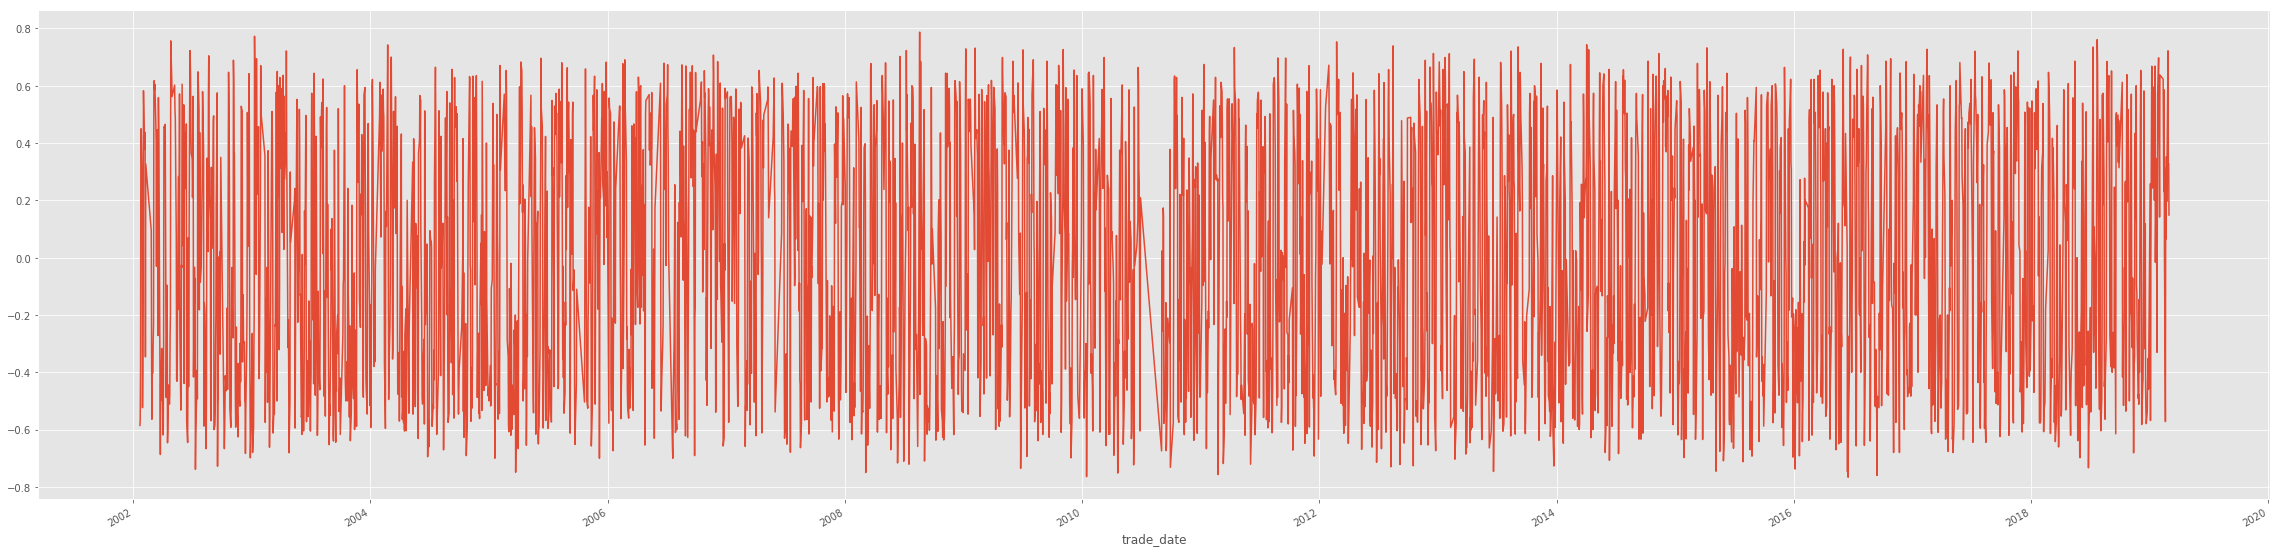

In [68]:
df_model1.data.psma1_norm.plot(figsize=(40,10),grid=True)

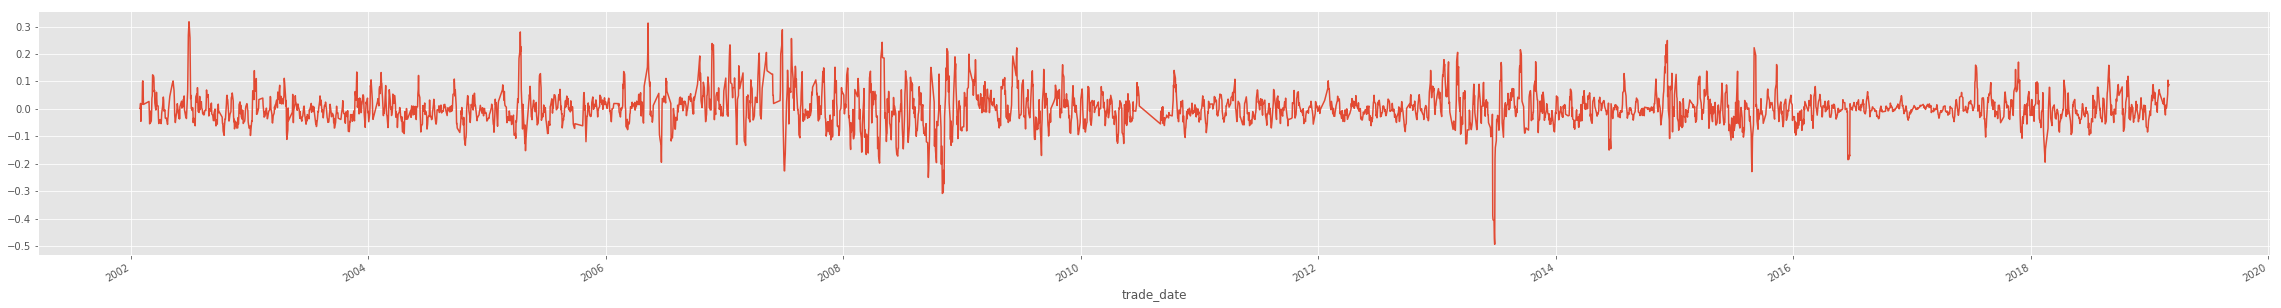

In [69]:
df_model1.data.pre_close.pct_change(5).plot(figsize=(40,5))

In [70]:
year_low = datetime.datetime(year=2002,month=1,day=1)
year_mid = datetime.datetime(year=2010,month=1,day=1)
year_up = datetime.datetime(year=2019,month=1,day=1)

In [71]:
in_sample = df_model1.data[(df_model1.data.index<year_mid)&(df_model1.data.index>year_low)]
in_sample

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return
trade_date,,,,,,,
2002-01-21,10.19,50244.65,-0.585542,-0.581622,0.000038,0.000031,-0.115451
2002-01-22,9.60,34656.40,-0.565714,-0.587603,0.000026,0.000025,-0.128857
2002-01-23,9.60,40742.45,-0.385714,-0.515284,0.000044,0.000028,-0.116022
2002-01-24,10.34,53538.60,0.448649,-0.128959,0.000054,0.000041,-0.060000
2002-01-25,10.36,24722.85,0.450000,-0.062500,0.000021,0.000019,0.004850
...,...,...,...,...,...,...,...
2009-12-23,22.72,213401.99,-0.560563,-0.628777,0.000018,0.000004,-0.094099
2009-12-24,22.55,294028.60,-0.461224,-0.578983,0.000010,0.000005,-0.092555
2009-12-29,23.28,243439.03,0.052174,-0.276949,0.000008,0.000004,-0.050184


In [72]:
out_sample = df_model1.data[(df_model1.data.index<year_up)&(df_model1.data.index>year_mid)]
out_sample

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return
trade_date,,,,,,,
2010-01-04,24.37,241922.76,0.398913,0.258696,0.000006,0.000005,0.072623
2010-01-05,23.71,556499.82,-0.142342,0.025000,0.000005,0.000005,0.051441
2010-01-06,23.30,412143.13,-0.524771,-0.130435,0.000003,0.000004,0.000859
2010-01-07,22.90,355336.85,-0.559732,-0.291848,0.000003,0.000003,-0.029250
2010-01-08,22.65,288543.06,-0.427907,-0.378261,0.000002,0.000003,-0.071341
...,...,...,...,...,...,...,...
2018-12-24,9.45,509117.67,-0.538095,-0.660638,0.000001,0.000001,-0.070796
2018-12-25,9.42,586615.45,-0.440000,-0.593814,0.000002,0.000001,-0.084548
2018-12-26,9.34,421140.60,-0.386667,-0.540000,0.000001,0.000001,-0.077075


In [73]:
def knn_predictor(insample,insample_col,single_outsample,knn=5):
    all_dist = np.sqrt(np.sum(np.square(\
                         insample[insample_col].values\
                         - single_outsample),axis=1))
    dist_index = all_dist.argsort()[:knn]
    return insample.iloc[dist_index]['future_return'].mean()
# 要return的是后面的future return 的mean，而不是distance的return
# --------------------------------------------------------------------------
variable = ['psma1_norm','psma2_norm','vsma1_norm','vsma2_norm']

predict = []

for sub_out_sample in out_sample.index[:]:
    row = out_sample[out_sample.index == sub_out_sample]
    outsample_factor = row[variable].values[0]
    predict.append(knn_predictor(insample=in_sample,insample_col=variable,single_outsample=outsample_factor,knn=5))
# --------------------------------------------------------------------------
temp_out_sample = out_sample.copy()
temp_out_sample['prediction'] = pd.Series(predict,index=out_sample.index)
out_sample = temp_out_sample

In [74]:
out_sample

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return,prediction
trade_date,,,,,,,,
2010-01-04,24.37,241922.76,0.398913,0.258696,0.000006,0.000005,0.072623,0.010093
2010-01-05,23.71,556499.82,-0.142342,0.025000,0.000005,0.000005,0.051441,0.007420
2010-01-06,23.30,412143.13,-0.524771,-0.130435,0.000003,0.000004,0.000859,-0.008892
2010-01-07,22.90,355336.85,-0.559732,-0.291848,0.000003,0.000003,-0.029250,-0.047385
2010-01-08,22.65,288543.06,-0.427907,-0.378261,0.000002,0.000003,-0.071341,-0.014494
...,...,...,...,...,...,...,...,...
2018-12-24,9.45,509117.67,-0.538095,-0.660638,0.000001,0.000001,-0.070796,-0.070595
2018-12-25,9.42,586615.45,-0.440000,-0.593814,0.000002,0.000001,-0.084548,-0.119949
2018-12-26,9.34,421140.60,-0.386667,-0.540000,0.000001,0.000001,-0.077075,-0.092580


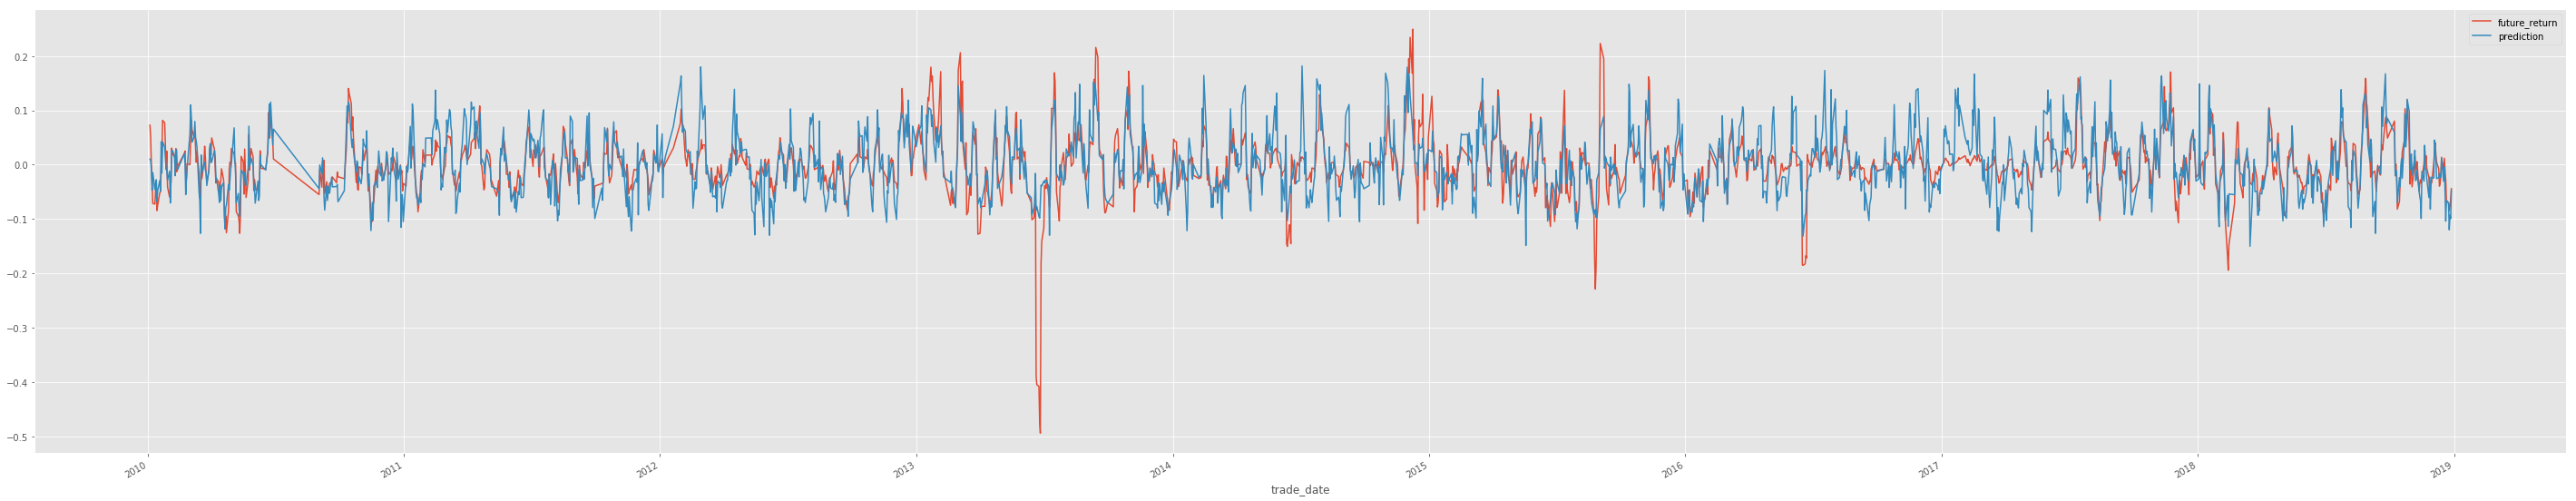

In [75]:
out_sample[['future_return','prediction']].plot(figsize=(50,10),grid=True)

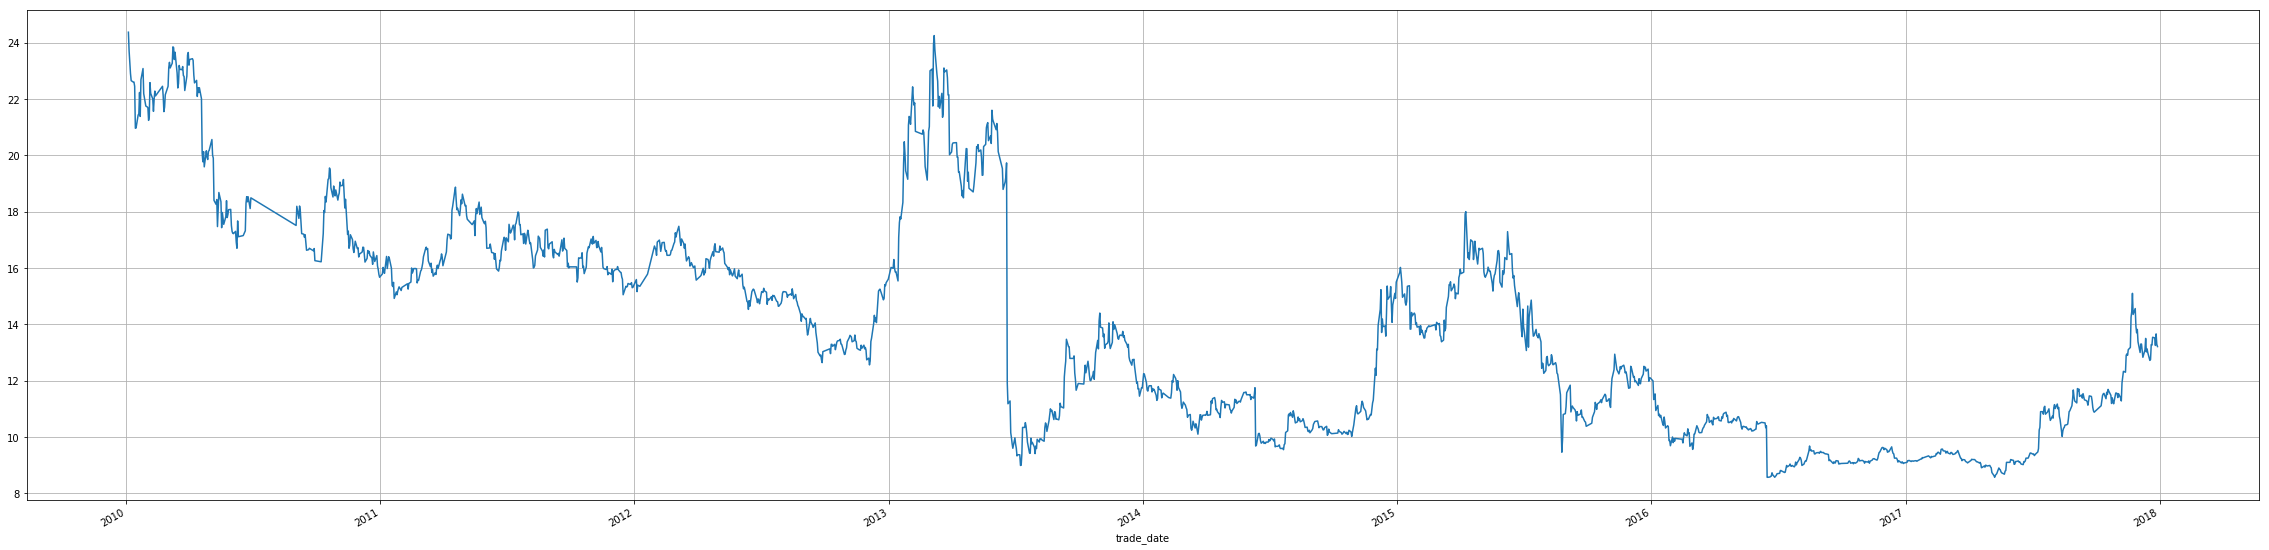

In [64]:
out_sample.pre_close.plot(figsize=(40,10),grid=True)

In [76]:
def signal_rule(x):
    if x > 0.05:
        return 1
    elif x < -0.05:
        return -1
    else:
        return 0

temp_out_sample = out_sample.copy()
temp_out_sample['signal'] = temp_out_sample.prediction.apply(signal_rule)
out_sample = temp_out_sample


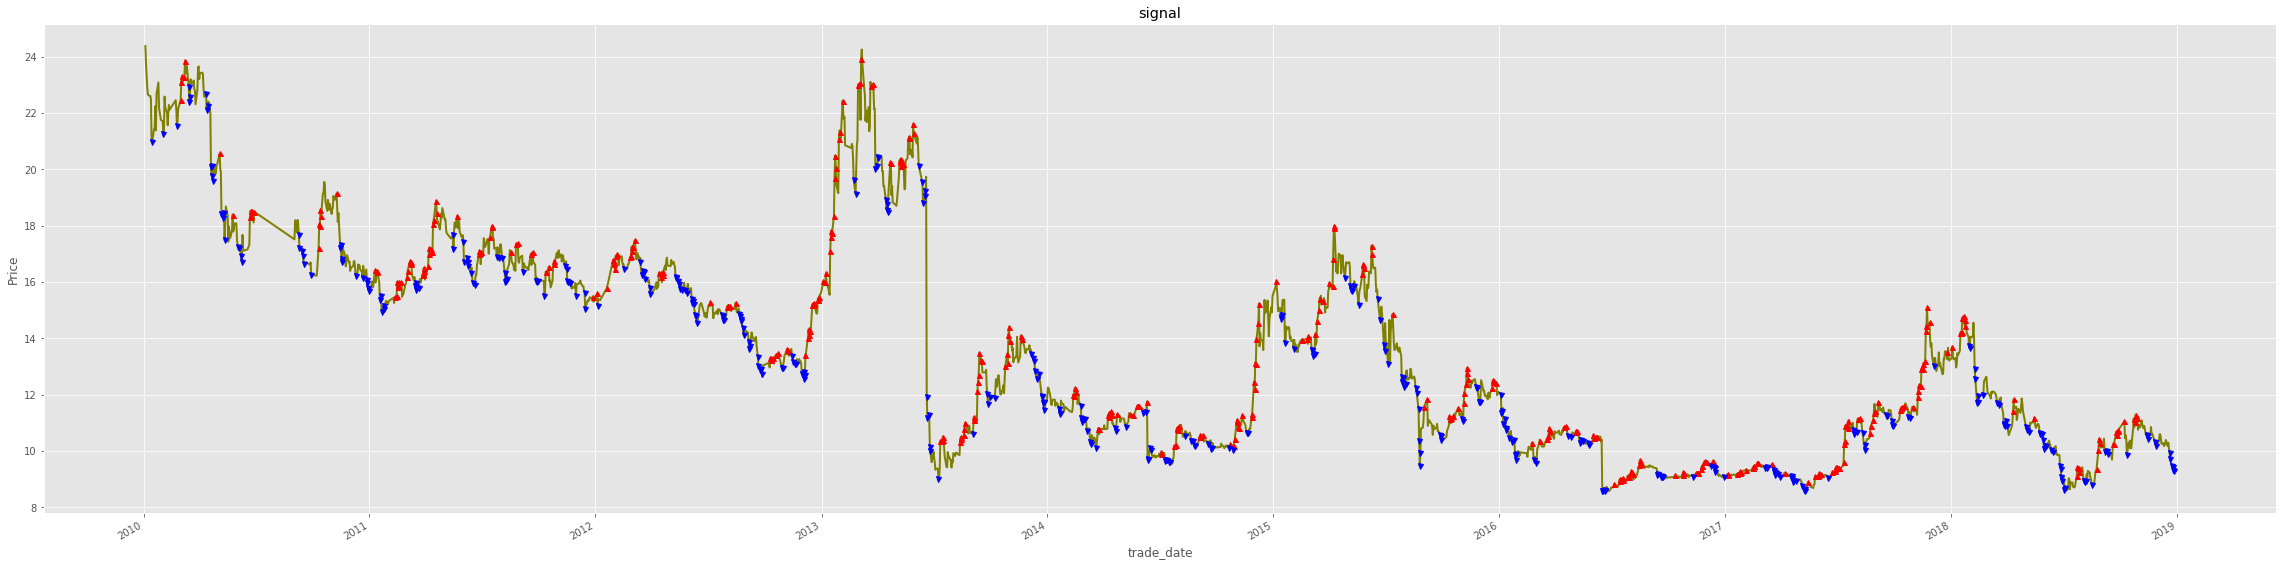

In [77]:
limit = 'signal'
# limit = 'signal'
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111,  ylabel='Price')
# ax2 = fig.add_subplot(212,  ylabel='volume')
out_sample.pre_close.plot(ax=ax1, color='olive', lw=2.,title=limit)
ax1.plot(out_sample[out_sample[limit] == 1].index,out_sample[out_sample[limit] == 1 ]['pre_close'],\
         '^', markersize=5, color='r')
ax1.plot(out_sample[out_sample[limit] == -1].index,out_sample[out_sample[limit] == -1 ]['pre_close'],\
         'v', markersize=5, color='b')

# ax2 = ax1.twinx()

# df_model['Full_Predict'].plot(ax=ax2, color='aqua', lw=2.,title='Predict')


plt.show()

In [45]:
out_sample

,pre_close,vol,psma1,psma2,vsma1,vsma2,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return,prediction,signal,stock_signal
trade_date,,,,,,,,,,,,,,
2010-01-04,24.37,241922.76,23.636,23.775,271496.530,227011.227,0.236110,0.247375,-0.048977,-0.068163,0.072623,-0.043163,0,0.0
2010-01-05,23.71,556499.82,23.868,23.661,323990.774,264521.541,0.241775,0.244499,-0.037110,-0.058355,0.051441,0.094094,1,0.2
2010-01-06,23.30,412143.13,23.872,23.540,357731.594,285949.583,0.241873,0.241447,-0.029482,-0.052751,0.000859,0.074530,1,0.2
2010-01-07,22.90,355336.85,23.734,23.437,356132.880,304218.362,0.238503,0.238848,-0.029843,-0.047974,-0.029250,0.073542,1,0.2
2010-01-08,22.65,288543.06,23.386,23.346,370889.124,318340.750,0.230006,0.236553,-0.026507,-0.044281,-0.071341,0.040959,0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,13.52,1585567.18,13.270,13.172,1463571.918,1325792.849,-0.016991,-0.020101,0.220515,0.219163,0.062893,0.040878,0,0.0
2017-12-26,13.25,1123688.45,13.370,13.147,1208721.018,1263821.115,-0.014549,-0.020731,0.162901,0.202958,0.039216,0.023483,0,0.0
2017-12-27,13.66,1366566.73,13.446,13.211,1260785.350,1271552.977,-0.012693,-0.019117,0.174671,0.204980,0.028614,0.023483,0,0.0


# # 带加仓的信号筛选

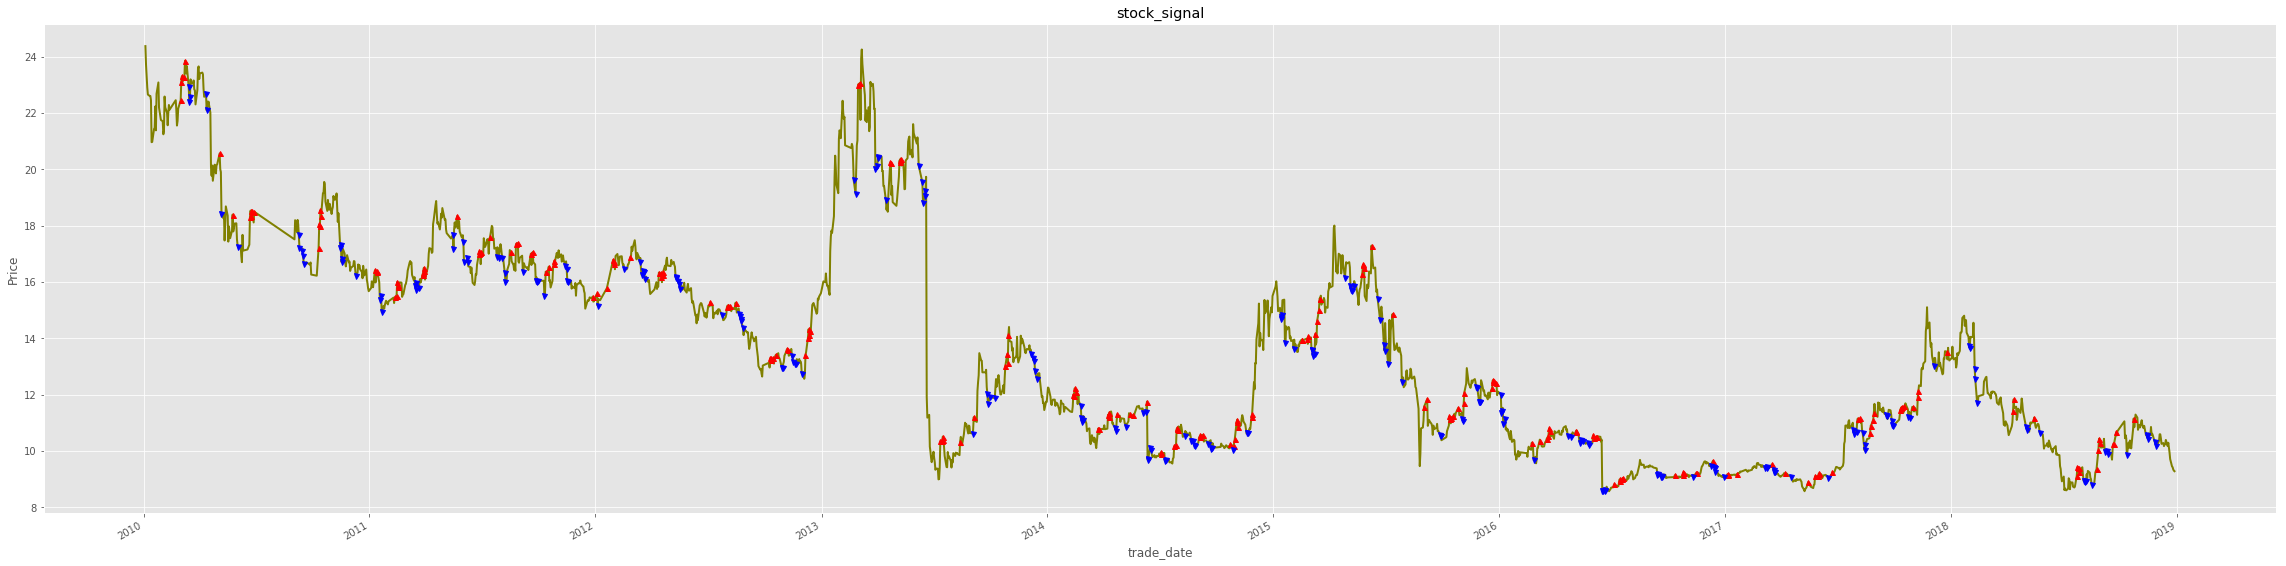

In [96]:
# 带加仓的信号筛选
sifted_signal = []
position = 0
jump = 0.2
for signal in out_sample.signal:
    if position == 0 or position < 0.001:
        position = 0
        if signal == 1:
            position += jump
            sifted_signal.append(jump)
            continue
        elif signal == -1:
            sifted_signal.append(0)
            continue
        elif signal == 0:
            sifted_signal.append(0)
            continue
    elif 0 < position < 1:
        if signal == 1:
            position += jump
            sifted_signal.append(jump)
            continue
        elif signal == -1:
            position -= jump
            sifted_signal.append(-jump)
            continue
        elif signal == 0:
            sifted_signal.append(0)
            continue
    elif position == 1:
        if signal == 1:
            sifted_signal.append(0)
            continue
        elif signal == -1:
            position -= jump
            sifted_signal.append(-jump)
            continue
        elif signal == 0:
            sifted_signal.append(0)
            continue

tmp = out_sample.copy()
tmp['stock_signal'] = sifted_signal
out_sample = tmp

limit = 'stock_signal'
# limit = 'signal'
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111,  ylabel='Price')
# ax2 = fig.add_subplot(212,  ylabel='volume')
out_sample.pre_close.plot(ax=ax1, color='olive', lw=2.,title=limit)
ax1.plot(out_sample[out_sample[limit] > 0].index,out_sample[out_sample[limit] > 0 ]['pre_close'],\
         '^', markersize=5, color='r')
ax1.plot(out_sample[out_sample[limit] < 0].index,out_sample[out_sample[limit] < 0 ]['pre_close'],\
         'v', markersize=5, color='b')

# ax2 = ax1.twinx()

# df_model['Full_Predict'].plot(ax=ax2, color='aqua', lw=2.,title='Predict')


plt.show()

In [79]:
(((out_sample.pre_close)*out_sample.stock_signal).sum())

5.607999999999986

# 不带加仓的信号筛选

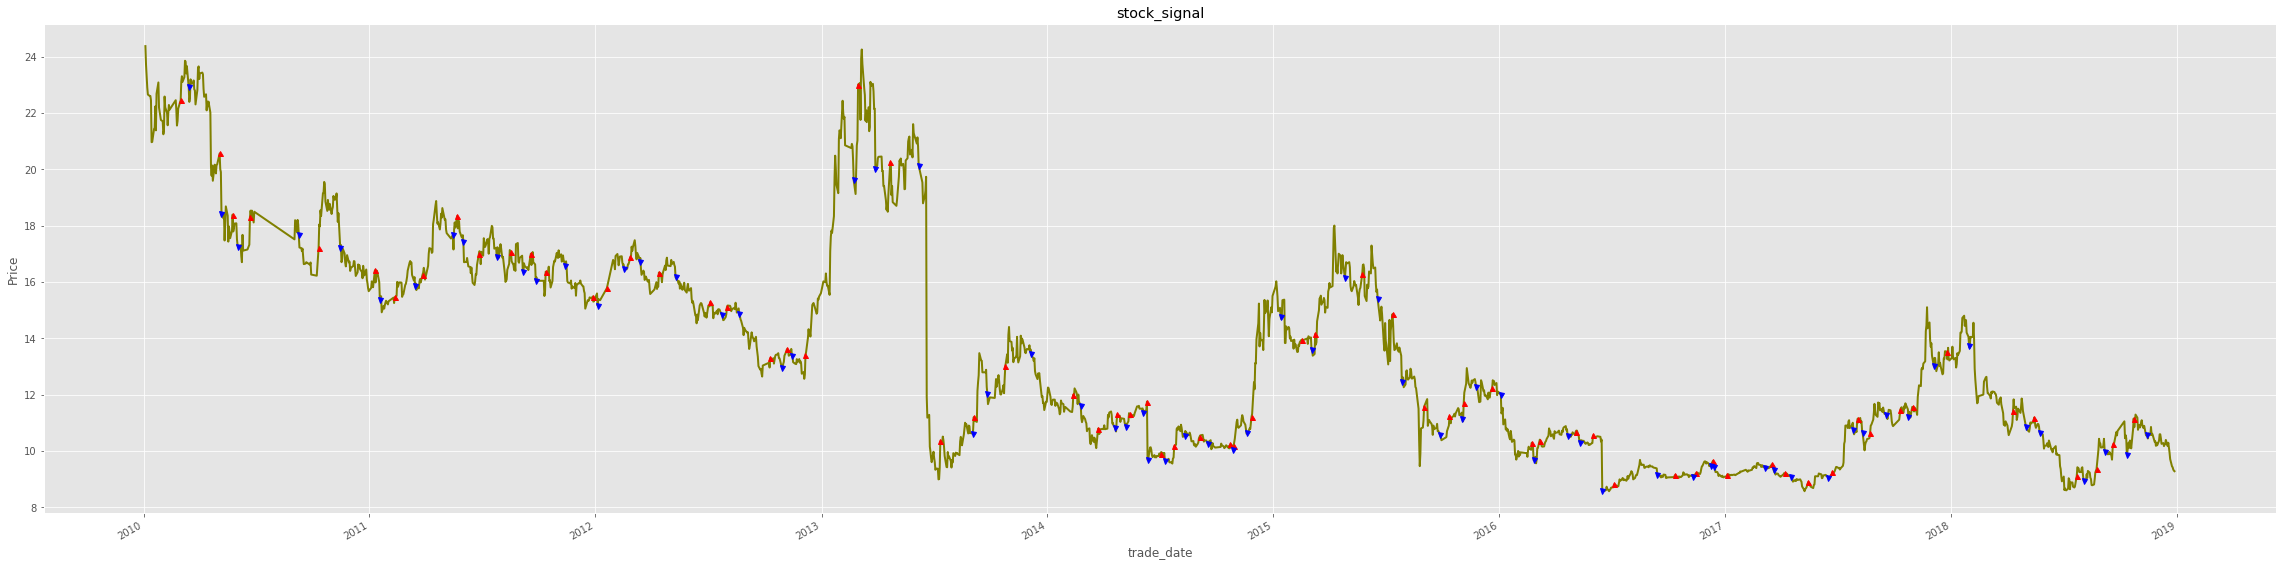

In [80]:
sifted_signal = []
status = out_sample.signal[0]
sifted_signal.append(status)
for signal in out_sample.signal[1:]:
    if status == 1:
        if signal == 1:
            status = 1
            sifted_signal.append(0)
            continue
        elif signal == -1:
            status = 0
            sifted_signal.append(-1)
            continue
        elif signal == 0:
            status == 0
            sifted_signal.append(0)
            continue
    elif status == 0:
        if signal == 1:
            status = 1
            sifted_signal.append(1)
            continue
        elif signal == -1:
            status = 0
            sifted_signal.append(0)
            continue
        elif signal == 0:
            status = 0
            sifted_signal.append(0)
            continue

tmp = out_sample.copy()
tmp['stock_signal'] = sifted_signal
out_sample = tmp

limit = 'stock_signal'
# limit = 'signal'
fig = plt.figure(figsize=(40,10))
ax1 = fig.add_subplot(111,  ylabel='Price')
# ax2 = fig.add_subplot(212,  ylabel='volume')
out_sample.pre_close.plot(ax=ax1, color='olive', lw=2.,title=limit)
ax1.plot(out_sample[out_sample[limit] > 0].index,out_sample[out_sample[limit] > 0 ]['pre_close'],\
         '^', markersize=5, color='r')
ax1.plot(out_sample[out_sample[limit] < 0].index,out_sample[out_sample[limit] < 0 ]['pre_close'],\
         'v', markersize=5, color='b')

# ax2 = ax1.twinx()

# df_model['Full_Predict'].plot(ax=ax2, color='aqua', lw=2.,title='Predict')


plt.show()

In [81]:
(((out_sample.pre_close)*out_sample.stock_signal).sum())

4.659999999999998

In [89]:
out_sample

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return,prediction,signal,stock_signal
trade_date,,,,,,,,,,
2010-01-04,24.37,241922.76,0.398913,0.258696,0.000006,0.000005,0.072623,0.010093,0,0
2010-01-05,23.71,556499.82,-0.142342,0.025000,0.000005,0.000005,0.051441,0.007420,0,0
2010-01-06,23.30,412143.13,-0.524771,-0.130435,0.000003,0.000004,0.000859,-0.008892,0,0
2010-01-07,22.90,355336.85,-0.559732,-0.291848,0.000003,0.000003,-0.029250,-0.047385,0,0
2010-01-08,22.65,288543.06,-0.427907,-0.378261,0.000002,0.000003,-0.071341,-0.014494,0,0
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,9.45,509117.67,-0.538095,-0.660638,0.000001,0.000001,-0.070796,-0.070595,-1,0
2018-12-25,9.42,586615.45,-0.440000,-0.593814,0.000002,0.000001,-0.084548,-0.119949,-1,0
2018-12-26,9.34,421140.60,-0.386667,-0.540000,0.000001,0.000001,-0.077075,-0.092580,-1,0


In [82]:
(((out_sample.pre_close)*out_sample.signal).sum())

584.8699999999999

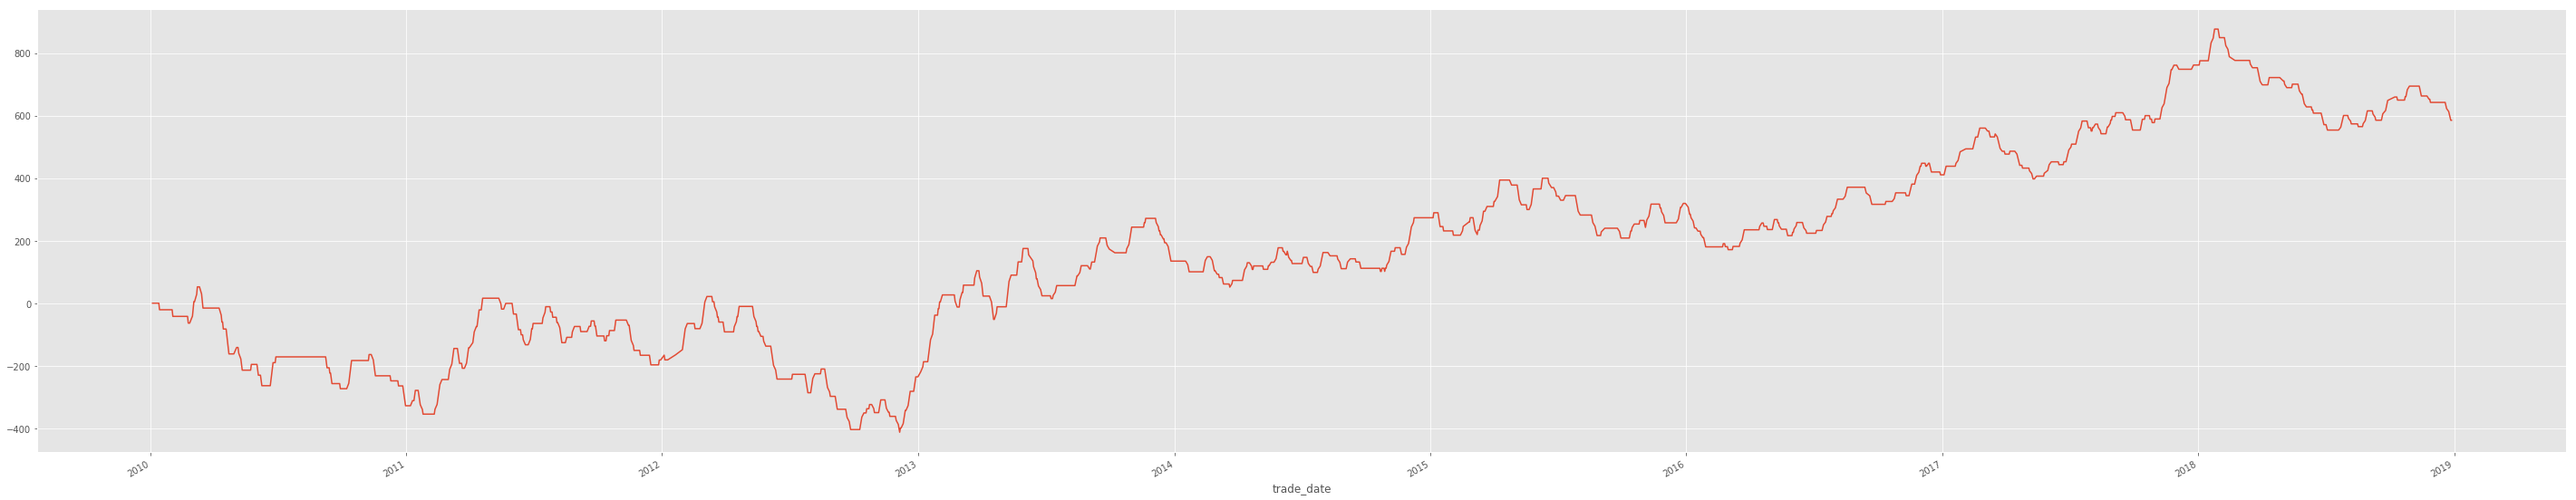

In [111]:
(out_sample.pre_close*out_sample.signal).cumsum().plot(figsize=(50,10))

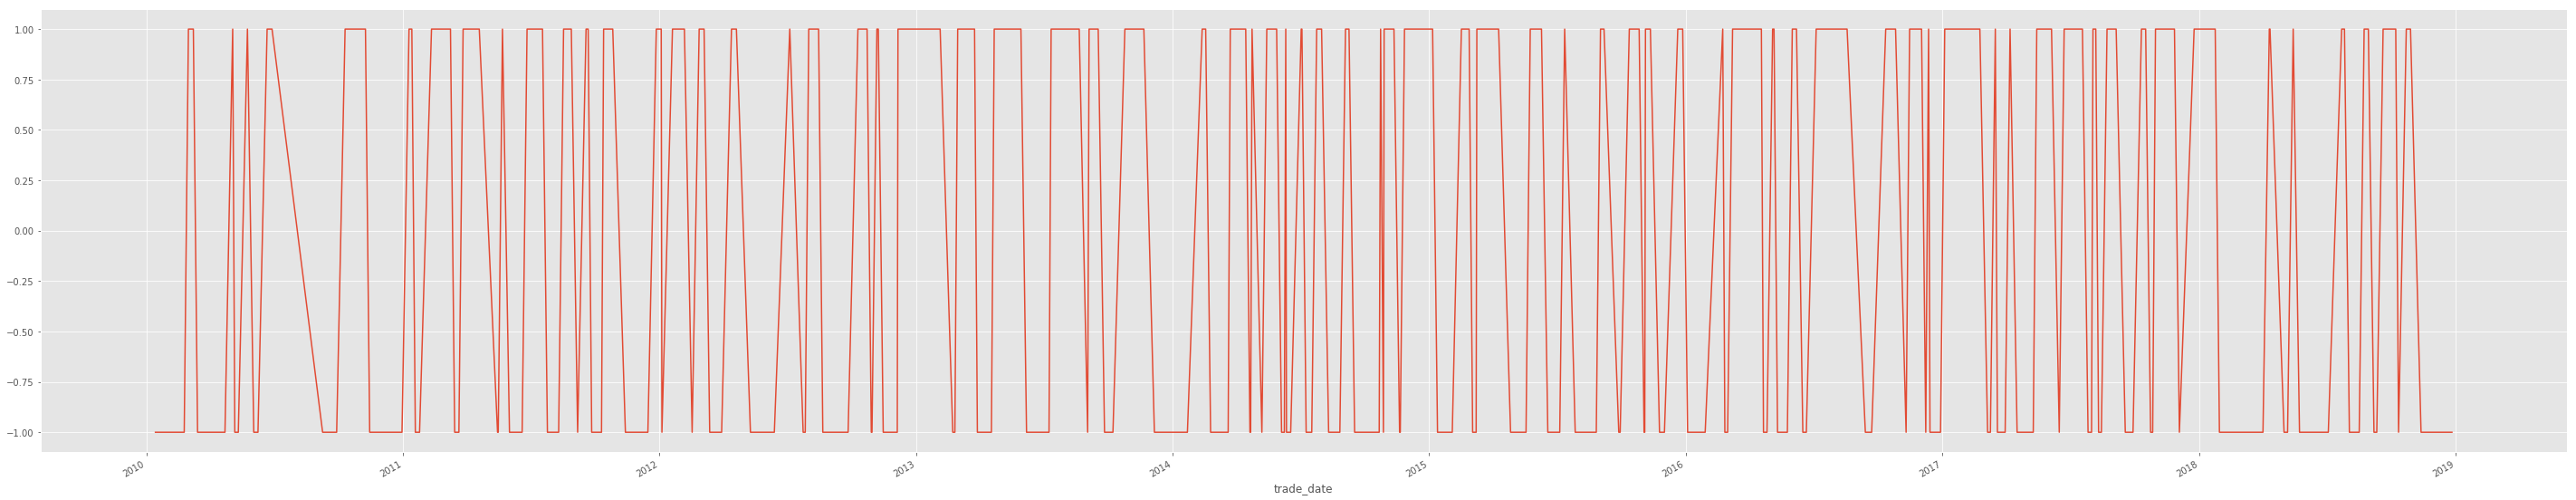

In [105]:
out_sample.signal[out_sample.signal != 0].plot(figsize=(50,10))

In [106]:
out_sample.signal.value_counts()

 0    1347
 1     400
-1     370
Name: signal, dtype: int64

In [103]:
(4/10000)*700

0.28

In [112]:
out_sample

,pre_close,vol,psma1_norm,psma2_norm,vsma1_norm,vsma2_norm,future_return,prediction,signal,stock_signal
trade_date,,,,,,,,,,
2010-01-04,24.37,241922.76,0.398913,0.258696,0.000006,0.000005,0.072623,0.010093,0,0.0
2010-01-05,23.71,556499.82,-0.142342,0.025000,0.000005,0.000005,0.051441,0.007420,0,0.0
2010-01-06,23.30,412143.13,-0.524771,-0.130435,0.000003,0.000004,0.000859,-0.008892,0,0.0
2010-01-07,22.90,355336.85,-0.559732,-0.291848,0.000003,0.000003,-0.029250,-0.047385,0,0.0
2010-01-08,22.65,288543.06,-0.427907,-0.378261,0.000002,0.000003,-0.071341,-0.014494,0,0.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-24,9.45,509117.67,-0.538095,-0.660638,0.000001,0.000001,-0.070796,-0.070595,-1,0.0
2018-12-25,9.42,586615.45,-0.440000,-0.593814,0.000002,0.000001,-0.084548,-0.119949,-1,0.0
2018-12-26,9.34,421140.60,-0.386667,-0.540000,0.000001,0.000001,-0.077075,-0.092580,-1,0.0
